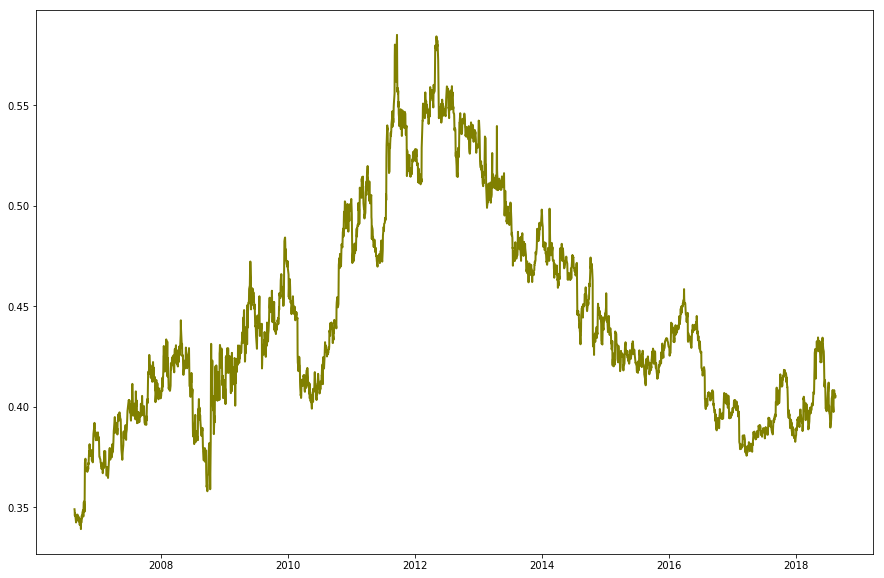

<Figure size 1440x1080 with 0 Axes>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

pd.core.common.is_list_like = pd.api.types.is_list_like

def read_csv_as_dataframe(symbol):
    csv_file_path = f'./{symbol}.csv'
    df_symbol = pd.read_csv(csv_file_path)
    return df_symbol


def drop_columns(df, column_list):
    df = df.drop(columns=column_list)
    return df


def create_trendline(df, buy, short):
    x = mdates.date2num(df['Date'])
    y = df[f'{buy}_{short}']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    return p, x


def plot_spread(df, buy, short):
    plt.figure(figsize=(15,10))
    plt.plot('Date', f'{buy}_{short}', data=df, marker='', color='olive', linewidth=2)
    trendline, x = create_trendline(df, buy, short)
    figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
    # todo: need to turn numbers back to dates before plotting
    # https://stackoverflow.com/questions/17638137/curve-fitting-to-a-time-series-in-the-format-datetime
    # plt.plot(x,p(x),"r-")
    plt.show()


def main():
    stock_buy = 'KO'
    stock_short = 'PEP'
    df_buy = read_csv_as_dataframe(stock_buy)
    df_short = read_csv_as_dataframe(stock_short)
    df_spread = pd.concat([df_buy['Close'], df_short['Close']], axis=1, keys=[stock_buy, stock_short])
    df_spread['Date'] = pd.to_datetime(df_buy['Date'])
    df_spread[f'{stock_buy}_{stock_short}'] = df_spread[stock_buy] / df_spread[stock_short]
    plot_spread(df_spread, stock_buy, stock_short)


main()
